$\large\textbf{Exercise 2.}$

$\large\text{Consider the function}$

\begin{align}
\ h(x) = \sum_{i=1}^{N} \frac{1}{10^{i}}(x_i - i)^2  
\end{align}


$\large\textbf{1.}$ Consider N = 3. Implement the evalf, evalg and other related functions for implementing gradient descent
(with exact line search and with backtracking line search) to solve $ min_{x}$ h(x).


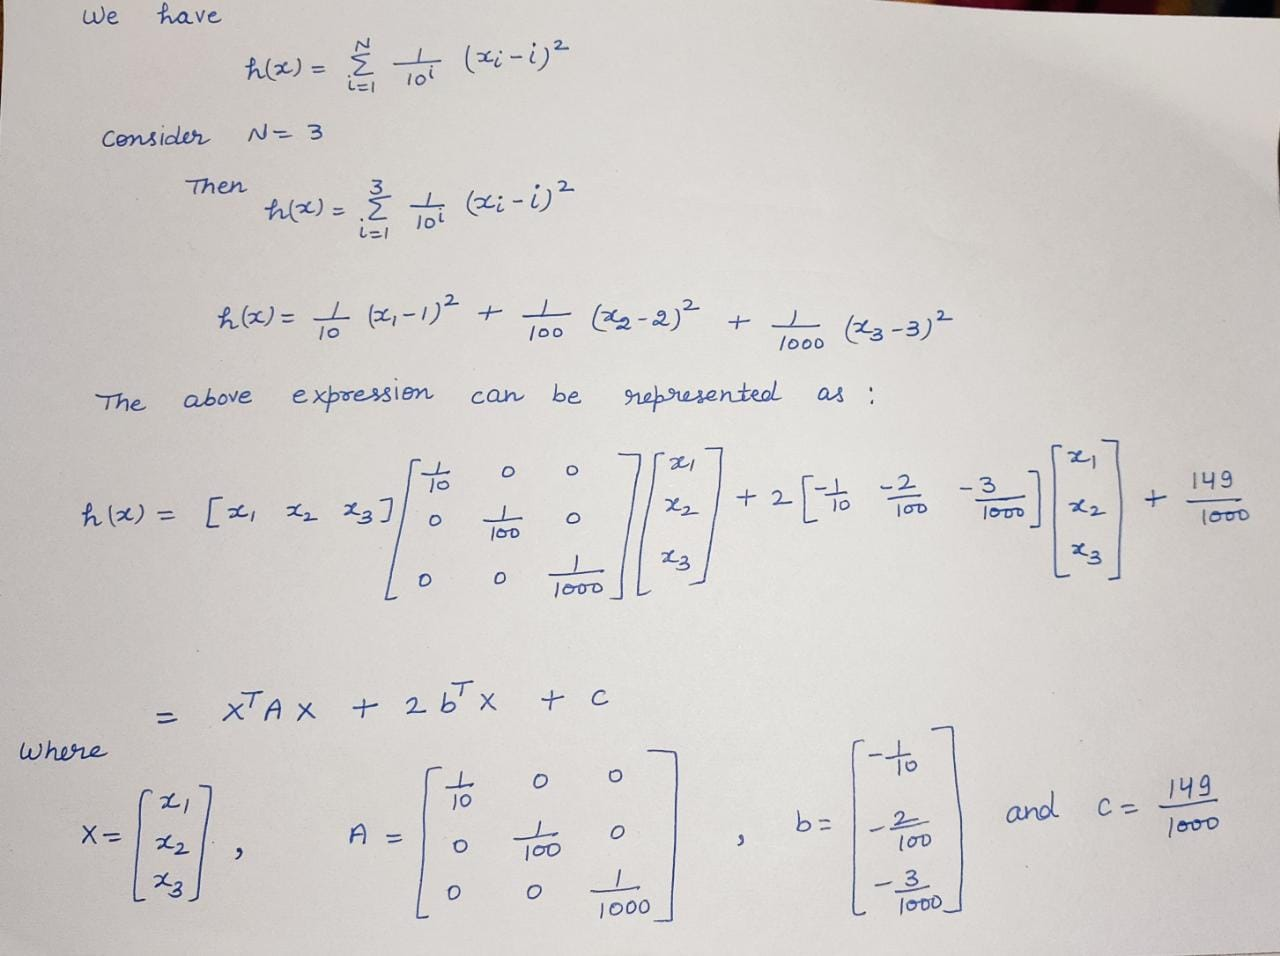

In [44]:
import numpy as np

In [45]:
def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 3
  return ((x[0]-1)**2)/10 + ((x[1]-2)**2)/100 + ((x[2]-3)**2)/1000

In [46]:
def evalg(x):   
  assert type(x) is np.ndarray and len(x) == 3 
  return np.array([(2*(x[0]-1))/10, (2*(x[1]-2))/100, (2*(x[2]-3))/1000])

In [47]:
def exact_steplength(gradf, A):
  assert type(gradf) is np.ndarray and len(gradf) == 3
  assert type(A) is np.ndarray and A.shape[0] == 3 and  A.shape[1] == 3
   
  steplength=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf.T,2*A),gradf)) 
  
  return steplength

In [48]:

def backtracking_steplength(x, gradf, alpha1, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 3
  assert type(gradf) is np.ndarray and len(gradf) == 3 
  alpha = alpha1
  while evalf(x+alpha*(-gradf)) > evalf(x)-gamma*alpha*np.dot((gradf.T),gradf):
    alpha=rho*alpha
  return alpha

In [49]:
Exact_line_search = 1
Backtracking_line_search = 2
Constant_step_length = 3

In [50]:
def find_minimizer(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 3
  assert type(tol) is float and tol>=0 
  A = np.array([[1/10, 0, 0],[0, 1/100, 0],[0, 0, 1/1000]])
  x = start_x
  g_x = evalg(x)

  
  if(line_search_type == Backtracking_line_search):
    alpha1 = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha1, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): 
 
    if line_search_type == Exact_line_search:
      step_length = exact_steplength(g_x, A) 
    elif line_search_type == Backtracking_line_search:
      step_length = backtracking_steplength(x,g_x, alpha1,rho, gamma) 
    elif line_search_type == Constant_step_length: 
      step_length = 0.1
    else:  
      raise ValueError('Error!')

  
    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k =k+1
    g_x = evalg(x) 

  return  x , k , evalf(x)

$\large\textbf{2.[R]}$ Note down the minimizer and minimum function value of h(x).

In [51]:
# Let us assume that the starting-point and stopping-tolerance for 2nd question be as mentioned below:
my_start_x = np.array([0, 0, 0])
my_tol= 1e-5

x_opt_els, k, f_val_els = find_minimizer(my_start_x, my_tol, Exact_line_search)
print("\n For Exact line search method:")
print("Minimizer of the function = ",x_opt_els, ", Minimum function value = ", f_val_els)

x_opt_bls, k, f_val_bls = find_minimizer(my_start_x, my_tol, Backtracking_line_search, 1, 0.5,0.5)
print("\n For Backtracking_line_search method:")
print("Minimizer of the function = ",x_opt_bls, ", Minimum function value = ", f_val_bls)

iter: 0  x: [0 0 0]  f(x): 0.14900000000000002  grad at x: [-0.2   -0.04  -0.006]  gradient norm: 0.20404901371974335

 For Exact line search method:
Minimizer of the function =  [1.00001416 2.         2.99546364] , Minimum function value =  2.059863064411924e-08
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [0 0 0]  f(x): 0.14900000000000002  grad at x: [-0.2   -0.04  -0.006]  gradient norm: 0.20404901371974335

 For Backtracking_line_search method:
Minimizer of the function =  [1.         2.         2.99500735] , Minimum function value =  2.4926564055659027e-08


$\large\textbf{3.[R]}$  Consider stopping tolerance $\tau$ = $10^{−9}$ and starting point $x^0 = ( 1/100 ,1/10 , 1)$. Compare the number of iterations taken by the gradient descent procedure which uses exact step length computation against the
gradient descent procedure which uses the backtracking line search procedure (with $\alpha^0$ = 1, $\rho$ = 0.5, $\gamma$= 0.5).
Comment on your observations

In [52]:
my_start_x = np.array([1/100, 1/10, 1])
my_tol= 1e-9

x_opt_els, k, f_val_els = find_minimizer(my_start_x, my_tol, Exact_line_search)
print("\n For Exact line search method:")
print("Minimizer of the function = ",x_opt_els, ", Minimum function value = ", f_val_els," iterations = ",k )

x_opt_bls, k, f_val_bls = find_minimizer(my_start_x, my_tol, Backtracking_line_search, 1, 0.5,0.5)
print("\n For Backtracking_line_search method:")
print("Minimizer of the function = ",x_opt_bls, ", Minimum function value = ", f_val_bls, "iterations = ",k )

iter: 0  x: [0.01 0.1  1.  ]  f(x): 0.13811  grad at x: [-0.198 -0.038 -0.004]  gradient norm: 0.2016531675922796

 For Exact line search method:
Minimizer of the function =  [1.         2.         2.99999952] , Minimum function value =  2.2763158970246047e-16  iterations =  245
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [0.01 0.1  1.  ]  f(x): 0.13811  grad at x: [-0.198 -0.038 -0.004]  gradient norm: 0.2016531675922796

 For Backtracking_line_search method:
Minimizer of the function =  [1.        2.        2.9999995] , Minimum function value =  2.4929930196397745e-16 iterations =  7594


Now compare the numbers of iteration taken by gradient decent procedure which uses exact step length computation against the
gradient descent procedure which uses the backtracking line search procedure .

$\large\textbf{Ans.}$

$\large\textbf{The number of iteration when uses exact step length =245 }$
$\large\textbf{The number of iteration when uses backtracking line search =7594 }$

$\large\textbf{4.[R]}$ Check if similar observations hold in the N = 4 case as well. Choose a starting point $x^0 = ( 1/1000, 1/100 ,1/10 , 1)$.
and for the backtracking line search procedure, use $\alpha ^0 $= 1, $\rho$ = 0.5, $\gamma$ = 0.5. Comment on your observations.

In [53]:

def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 4
  return ((x[0]-1)**2)/10 + ((x[1]-2)**2)/100 + ((x[2]-3)**2)/1000 + ((x[3]-4)**2/10000)

In [54]:

def evalg(x): 
  assert type(x) is np.ndarray and len(x) == 4 
  return np.array([(2*(x[0]-1))/10, (2*(x[1]-2))/100, (2*(x[2]-3))/1000, (2*(x[3]-4))/10000])

In [55]:
def exact_steplength(gradf, A):
  assert type(gradf) is np.ndarray and len(gradf) == 4
  assert type(A) is np.ndarray and A.shape[0] == 4 and  A.shape[1] == 4 
   
  step_length=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf,2*A),gradf)) 
  
  return step_length

In [56]:
def backtracking_steplength(x, gradf, alpha1, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 4
  assert type(gradf) is np.ndarray and len(gradf) == 4 
  
  alpha = alpha1
  while evalf(x+alpha*(-gradf)) > evalf(x)-gamma*alpha*np.dot((gradf.T),gradf):
    alpha=rho*alpha
  return alpha

In [61]:
def find_minimizer(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == 4
  assert type(tol) is float and tol>=0 
  A = np.array([[1/10, 0, 0,0],[0, 1/100, 0,0],[0, 0, 1/1000,0],[0, 0, 0, 1/10000]])
  x = start_x
  g_x = evalg(x)

  
  if(line_search_type == Backtracking_line_search):
    alpha1 = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha1, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): 
 
    if line_search_type == Exact_line_search:
      step_length = exact_steplength(g_x, A) 
    elif line_search_type == Backtracking_line_search:
      step_length = backtracking_steplength(x,g_x, alpha1,rho, gamma) 
    elif line_search_type == Constant_step_length: 
      step_length = 0.1
    else:  
      raise ValueError('Error!')

  
    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k =k+1
    g_x = evalg(x) 

  return  x , k , evalf(x)

In [62]:
my_start_x = np.array([1/10000,1/100, 1/10, 1])
my_tol= 1e-9
x_opt = find_minimizer(my_start_x, my_tol, Constant_step_length)
print('for constant step length',x_opt)

iter: 0  x: [1.e-04 1.e-02 1.e-01 1.e+00]  f(x): 0.14889100100000002  grad at x: [-0.19998 -0.0398  -0.0058  -0.0006 ]  gradient norm: 0.2039853926142752
for constant step length (array([1.      , 2.      , 3.      , 3.999995]), 665228, 2.499959459960538e-15)


In [63]:
x_opt = find_minimizer(my_start_x, my_tol, Backtracking_line_search,1,0.5,0.5)
print(x_opt)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1.e-04 1.e-02 1.e-01 1.e+00]  f(x): 0.14889100100000002  grad at x: [-0.19998 -0.0398  -0.0058  -0.0006 ]  gradient norm: 0.2039853926142752
(array([1.      , 2.      , 3.      , 3.999995]), 66517, 2.4997720868765853e-15)


In [64]:
x_opt = find_minimizer(my_start_x, my_tol, Exact_line_search)
print(x_opt)

iter: 0  x: [1.e-04 1.e-02 1.e-01 1.e+00]  f(x): 0.14889100100000002  grad at x: [-0.19998 -0.0398  -0.0058  -0.0006 ]  gradient norm: 0.2039853926142752
(array([1.        , 2.        , 3.        , 3.99999527]), 2249, 2.2356249320800804e-15)


$\large\textbf{Comment:}$

Iterations in Exact line search = 2249
Iterations in Backtracking  line search = 66517


Hence, Exact line search is the faster approch to reach close to minimumizer in comparision of back tracking.

5. [R] Can you also comment on the possible observations for N > 4 case as well, without actually running the
program?

AS we observe that for N=3 Back tracking line search take 7594 iterations and for N=4 it takes 66517. So by increasement of N, the no. of iterations in back tracking increases most rapidly.\
Same as as we increase N the no. of iterations in Exact line search increases from 245 to 2249.That means it also increases almost 10th times.
We conclude that by increasement in N the no. of iteration increases rapidly.But rate of increasement of iteration in both method remain almost same..